HANDWRITTEN DIGIT CLASSIFICATION

- Dataset: MNIST Data.csv (contains images of digits 0-9)
- Task: Build a Neural Network to classify digits

In [2]:
#Importing all the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#Loading the dataset

data = pd.read_csv(r"C:\Users\sanja\Downloads\MNIST Data.csv") 
print("Shape of MNIST data:", data.shape)

Shape of MNIST data: (42000, 785)


In [4]:
#Seperating the data into features of pixels and labels as X and Y

X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

print("Shape of X(pixels):", X.shape) #All columnns except first column
print("Shape of Y(labels):", Y.shape) #First column is the label

Shape of X(pixels): (42000, 784)
Shape of Y(labels): (42000,)


In [5]:
#Normalizing data
X = X/255.0

In [6]:
# Fix seeds for reproducibility
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

#Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [7]:
#One HOT Encoding
Y_train_cat =  to_categorical(Y_train, num_classes=10)
Y_test_cat = to_categorical(Y_test, num_classes=10)

In [8]:
#Building the neural network model

model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Train the model
history = model.fit(X_train,Y_train_cat,validation_data=(X_test,Y_test_cat),epochs=15, batch_size=64)


Epoch 1/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9001 - loss: 0.3537 - val_accuracy: 0.9448 - val_loss: 0.1943
Epoch 2/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9539 - loss: 0.1521 - val_accuracy: 0.9550 - val_loss: 0.1511
Epoch 3/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9688 - loss: 0.1048 - val_accuracy: 0.9594 - val_loss: 0.1369
Epoch 4/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9774 - loss: 0.0774 - val_accuracy: 0.9606 - val_loss: 0.1267
Epoch 5/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9836 - loss: 0.0580 - val_accuracy: 0.9636 - val_loss: 0.1197
Epoch 6/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0430 - val_accuracy: 0.9660 - val_loss: 0.1152
Epoch 7/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9912 - loss: 0.0328 - val_accuracy: 0.9668 - val_loss: 0.1195
Epoch 8/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9933 - loss: 0.0264 - val_accuracy: 0.

In [10]:
#Evaluate the model accuracy
test_loss, test_acc = model.evaluate(X_test,Y_test_cat)
print(f"Test accuracy: {test_acc *100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.1390
Test accuracy: 97.05%


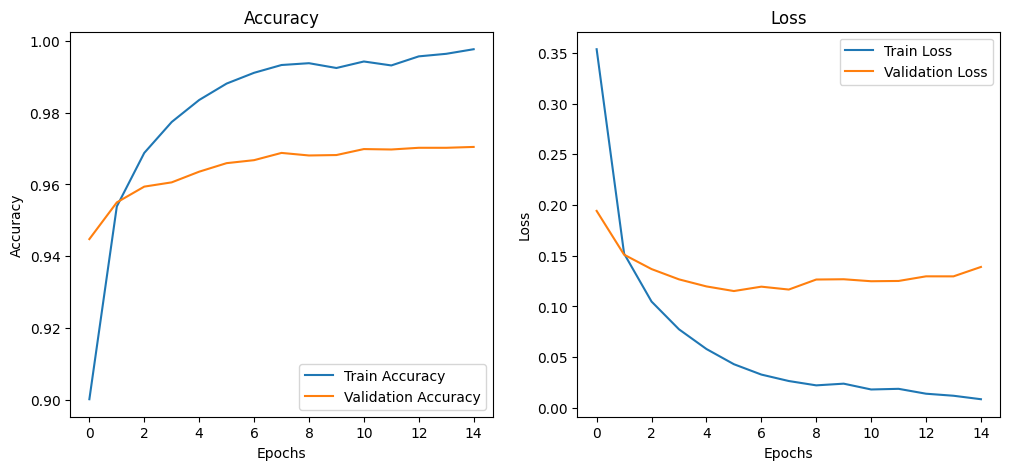

In [11]:

plt.figure(figsize=(12,5))

#Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
#Predictions for test set

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


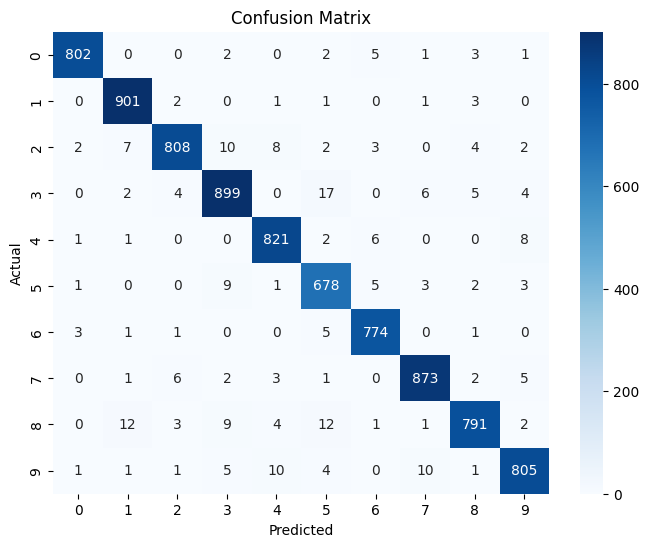

In [13]:
#Confusion matrix

cm = confusion_matrix(Y_test, Y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
#Classification Report

print("Classification report:")
print(classification_report(Y_test, Y_pred_classes))


Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       816
           1       0.97      0.99      0.98       909
           2       0.98      0.96      0.97       846
           3       0.96      0.96      0.96       937
           4       0.97      0.98      0.97       839
           5       0.94      0.97      0.95       702
           6       0.97      0.99      0.98       785
           7       0.98      0.98      0.98       893
           8       0.97      0.95      0.96       835
           9       0.97      0.96      0.97       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Digit: 6
Actual Digit: 6


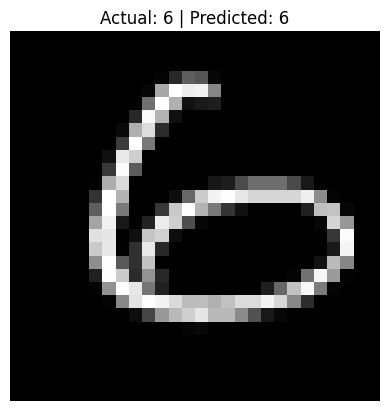

In [15]:
#Predict a single sample

sample_index = 10
sample = X_test[sample_index].reshape(1,-1)
prediction = model.predict(sample)
print(f"Predicted Digit: {np.argmax(prediction)}")
print(f"Actual Digit: {Y_test[sample_index]}")

plt.imshow(X_test[sample_index].reshape(28,28),cmap = 'gray')
plt.title(f"Actual: {Y_test[sample_index]} | Predicted: {np.argmax(prediction)}")
plt.axis('off')
plt.show()